# **Support Vector Machines (SVM)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df0 = pd.read_csv('DATASETS/mouse_viral_study.csv')
df = df0.copy()
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508,8.583,0
1,4.126,3.073,1
2,6.428,6.370,0
3,3.673,4.905,1
4,1.580,2.441,1


In [3]:
df.tail()

,Med_1_mL,Med_2_mL,Virus Present
395,2.884,3.272,1
396,7.291,9.489,0
397,7.895,8.273,0
398,2.691,2.675,1
399,7.588,9.474,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


# **Manually Defining the Separating Hyperplane in SVM**

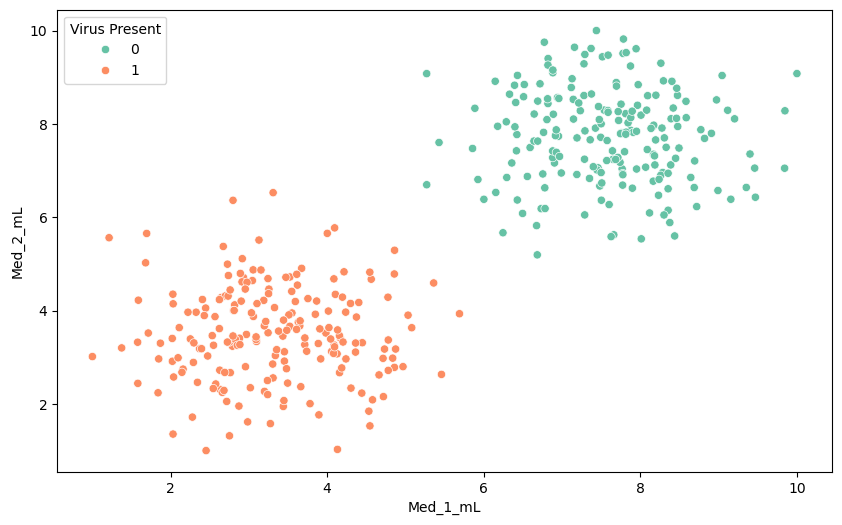

In [5]:
sns.scatterplot(x = "Med_1_mL", y = "Med_2_mL", hue = "Virus Present", data = df, palette = "Set2");

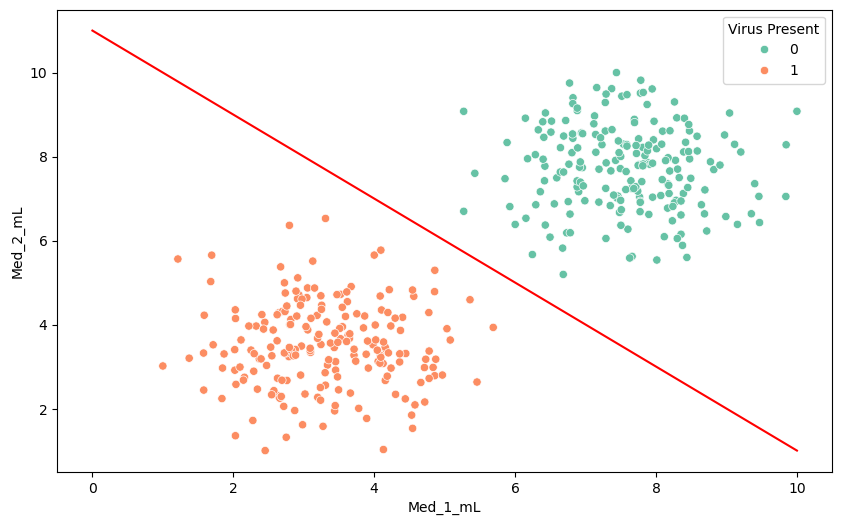

In [6]:
sns.scatterplot(x = "Med_1_mL", y = "Med_2_mL", hue = "Virus Present",data = df, palette = "Set2")

x = np.linspace(0, 10,100)

m = -1
b = 11
y = m*x + b

plt.plot(x, y, "red");

# **Modelling**

In [7]:
from sklearn.svm import SVC

In [8]:
X = df.drop("Virus Present", axis=1)
y = df["Virus Present"]

In [9]:
model = SVC(kernel="linear", C=1)

In [10]:
model.fit(X, y)

SVC(C=1, kernel='linear')

In [12]:
from svm_margin_plot import plot_svm_boundary

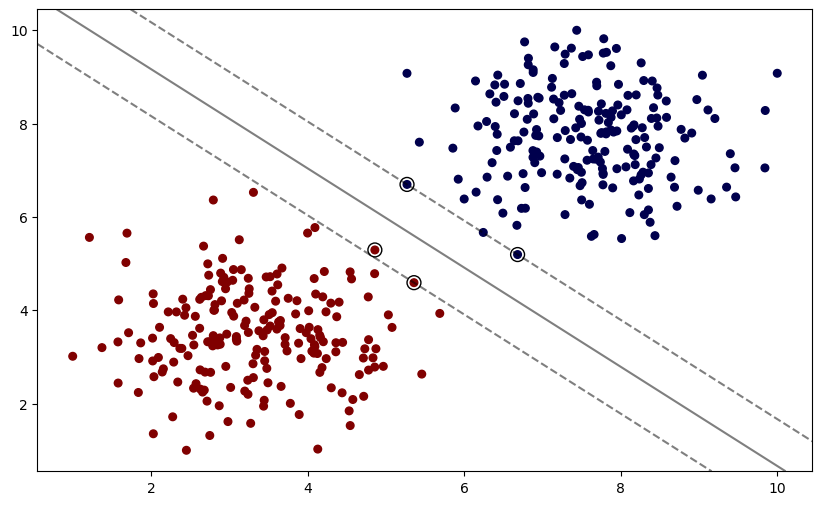

In [13]:
plot_svm_boundary(model, X, y)

# **SVM HyperParameters**

## C

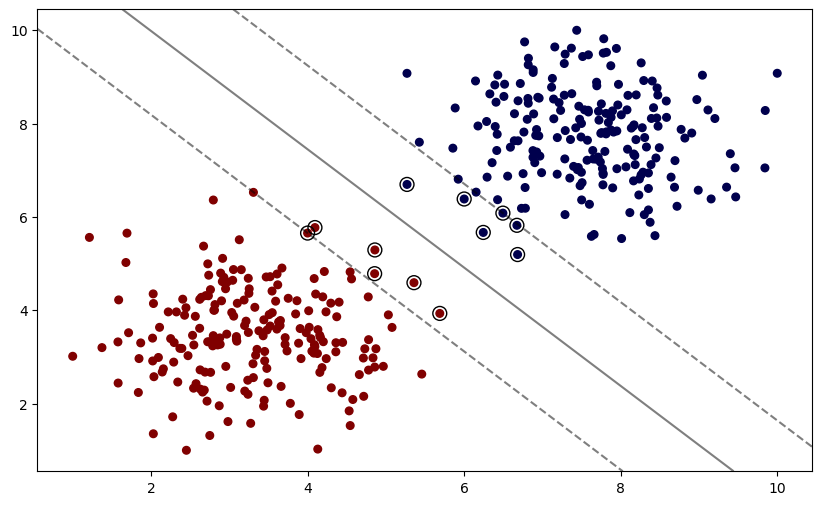

In [16]:
model = SVC(kernel="linear", C= 0.1)

model.fit(X, y)

plot_svm_boundary(model, X, y)

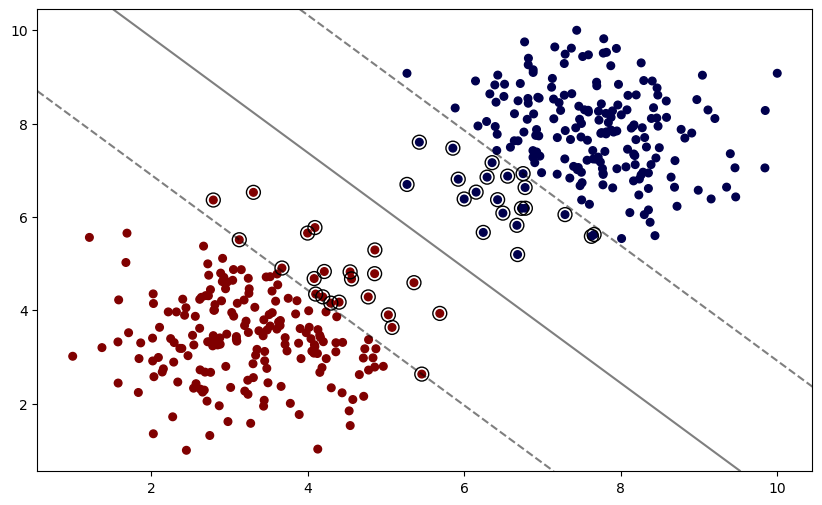

In [17]:
model = SVC(kernel="linear", C= 0.01)

model.fit(X, y)

plot_svm_boundary(model, X, y)

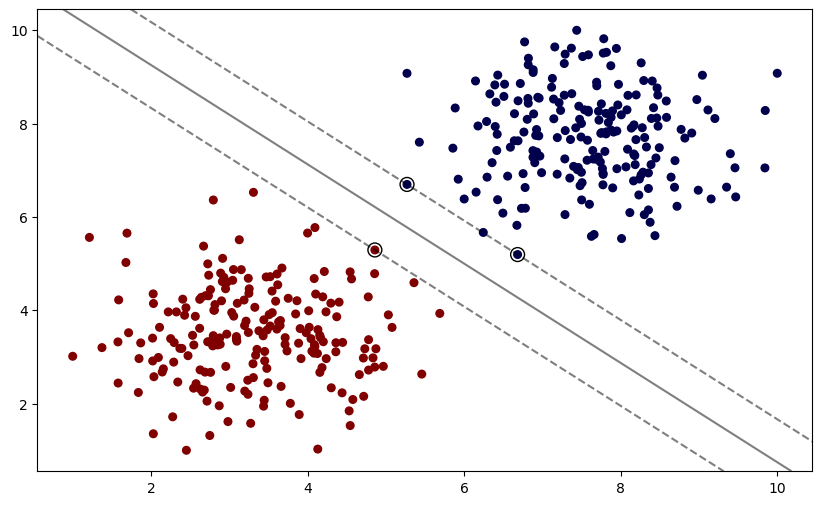

In [18]:
model = SVC(kernel="linear", C= 10)

model.fit(X, y)

plot_svm_boundary(model, X, y)

## kernel

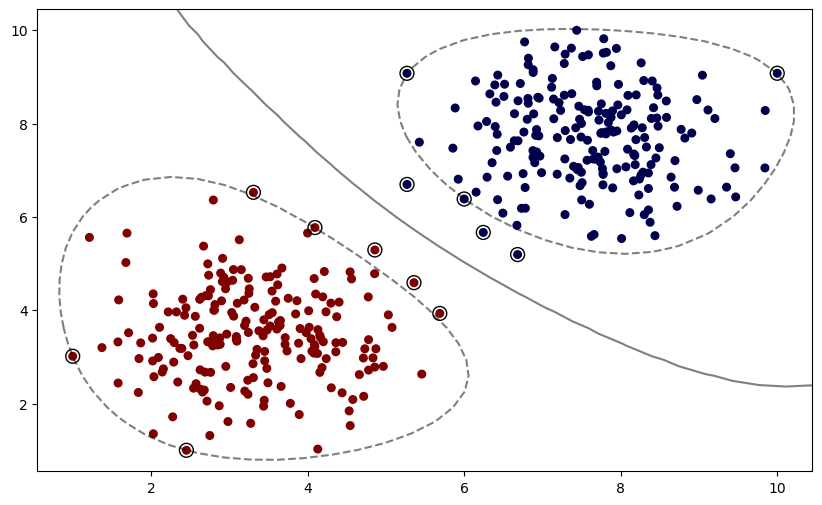

In [19]:
model = SVC(kernel="rbf", C=1, gamma= 0.1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

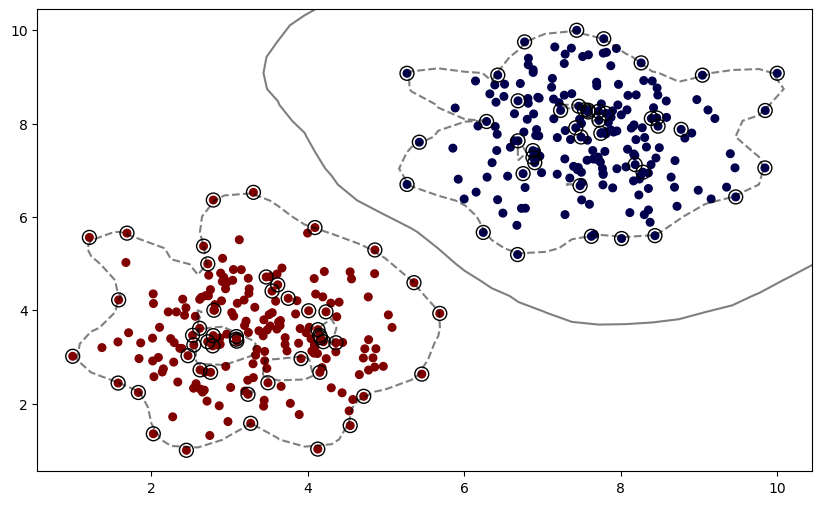

In [20]:
model = SVC(kernel="rbf", C=1, gamma= 1) 
model.fit(X, y)
plot_svm_boundary(model, X, y)

## gamma

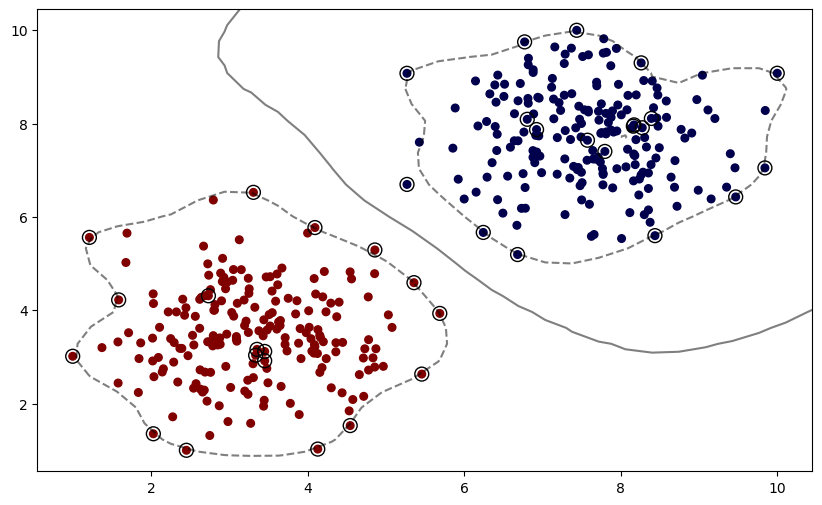

In [21]:
model = SVC(kernel="rbf", C=1, gamma= 0.5)
model.fit(X, y)
plot_svm_boundary(model, X, y)

## degree

> Polynomial kernel fonksiyonunun derecesidir. Yalnızca polynomial kernel kullanıldığında anlamlıdır.

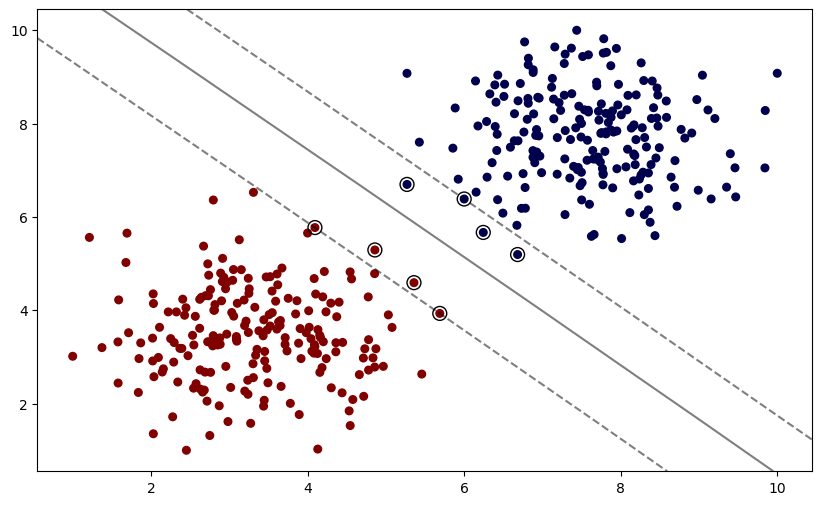

In [22]:
model = SVC(kernel="poly", C= 0.01, degree=3)
model.fit(X, y)
plot_svm_boundary(model, X, y)

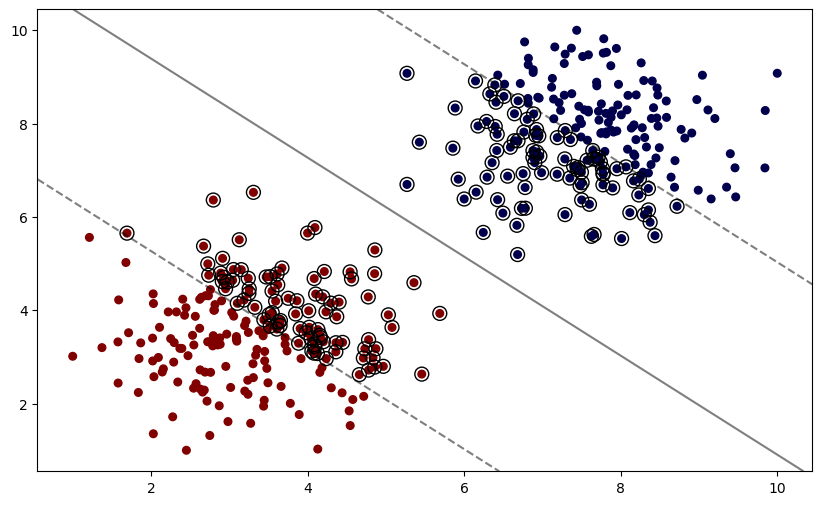

In [23]:
model = SVC(kernel="poly", C= 0.01, degree=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

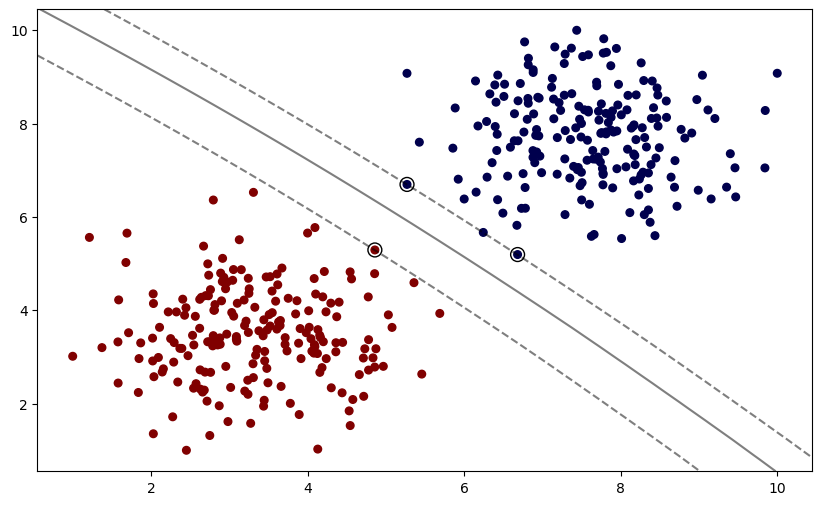

In [24]:
model = SVC(kernel="poly", C= 0.01, degree=5)
model.fit(X, y)
plot_svm_boundary(model, X, y)

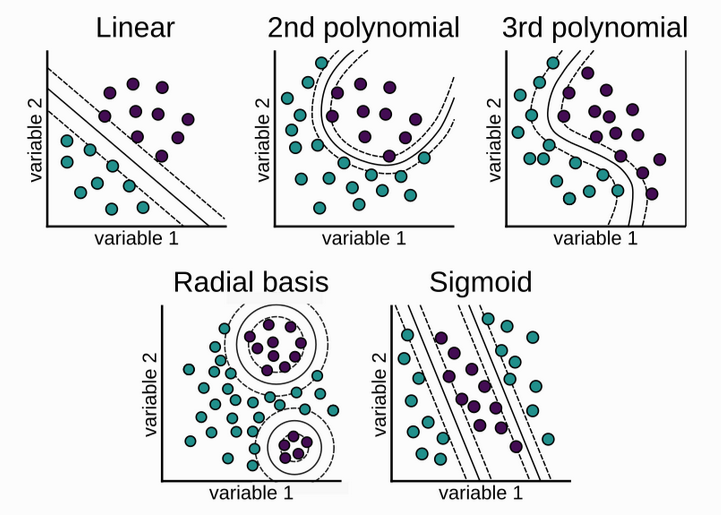

# **GridSearchCV**

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
svm = SVC()

param_grid = {
    'C': [0.01, 0.1, 0.5, 1, 10, 1000],  # 0.05
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'gamma': ["scale", "auto", 0.1, 1],  # 0.01,0.05,0.5
    'degree': [1, 2, 3] # poly kullandığımız için degree verdik. poly olmasaydı gerek yoktu.
}

# gamma=auto 1 / n_features
# gamma=scale 1 / n_features * X.var()

grid = GridSearchCV(svm, param_grid, n_jobs=-1)

In [27]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 1000],
                         'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [28]:
grid.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}